# **Hotel Booking Analyst**

**A hotel chain seeks to optimize its booking system by understanding patterns in customer behavior and factors influencing booking cancellations. The dataset includes booking details, customer demographics, and accommodation information, which can be analyzed to improve operational efficiency and customer satisfaction**

Business Goals:
* Predict Booking Cancellations: Develop a model to predict whether a booking will be canceled.

### **Import Library and Load Dataset**

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Display settings for pandas
pd.set_option('display.max_columns', None)


In [107]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Simulation 2nd/train (1).csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


## **Data Understanding**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

**The dataset has 83293 rows and 32 columns**

Categorized Columns

* Numerical Columns

  lead_time, arrival_date_year,
  arrival_date_week_number,
  arrival_date_day_of_month,
  stays_in_weekend_nights,
  stays_in_week_nights,
  adults,
  children,
  babies,
  is_repeated_guest,
  previous_cancellations,
  previous_bookings_not_canceled,
  booking_changes,
  days_in_waiting_list,
  adr,
  required_car_parking_spaces,
  total_of_special_requests.

* Categorical Columns

  hotel,
  arrival_date_month,
  meal,
  country,
  market_segment,
  distribution_channel,
  reserved_room_type,
  assigned_room_type,
  deposit_type,
  customer_type,
  reservation_status.

* Identifier/Date Columns

  reservation_status_date (date-related),
  bookingID (identifier)

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.00,0.0,1.0,1.0
lead_time,83293.0,103.914230,106.874124,0.0,18.00,69.0,160.0,737.0
arrival_date_year,83293.0,2018.156808,0.706656,2017.0,2018.00,2018.0,2019.0,2019.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.00,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.00,2.0,2.0,55.0
children,83290.0,0.103614,0.398821,0.0,0.00,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.00,0.0,0.0,10.0


In [110]:
df.describe(include = 'object').T

,count,unique,top,freq
hotel,83293,64,Renaissance New York Times Square Hotel New Yo...,1373
arrival_date_month,83293,12,August,9643
meal,83293,5,BB,64424
country,82947,165,PRT,33952
market_segment,83293,8,Online TA,39445
distribution_channel,83293,5,TA/TO,68368
reserved_room_type,83293,10,A,60062
assigned_room_type,83293,11,A,51702
deposit_type,83293,3,No Deposit,72979
customer_type,83293,4,Transient,62535


### **Show the unique values and its number**

In [111]:
features = df.columns.to_list()
for i in features:
    print(f'the number of unique values of {i} is {len(df[i].unique())}')
    values_counts = pd.DataFrame(df[i].value_counts())
    print(f'the values of the {i} are : \n{values_counts}')
    print('=========================================')

the number of unique values of hotel is 64
the values of the hotel are : 
                                                    count
hotel                                                    
Renaissance New York Times Square Hotel New Yor...   1373
Sacramento Airport Natomas Courtyard Sacramento...   1372
Las Vegas Marriott Las Vegas, NV                     1371
Crystal Cove, Barbados Barbados                      1360
Protea Hotel by Marriott Midrand Midrand, South...   1352
...                                                   ...
W New York – Union Square New York, NY               1250
The House, Barbados Barbados                         1249
Sheraton Grand Rio Hotel & Resort Rio de Janeir...   1249
African Pride Melrose Arch, Autograph Collectio...   1246
Residence Inn Rio de Janeiro Barra da Tijuca Ba...   1246

[64 rows x 1 columns]
the number of unique values of is_canceled is 2
the values of the is_canceled are : 
             count
is_canceled       
0            52516
1      

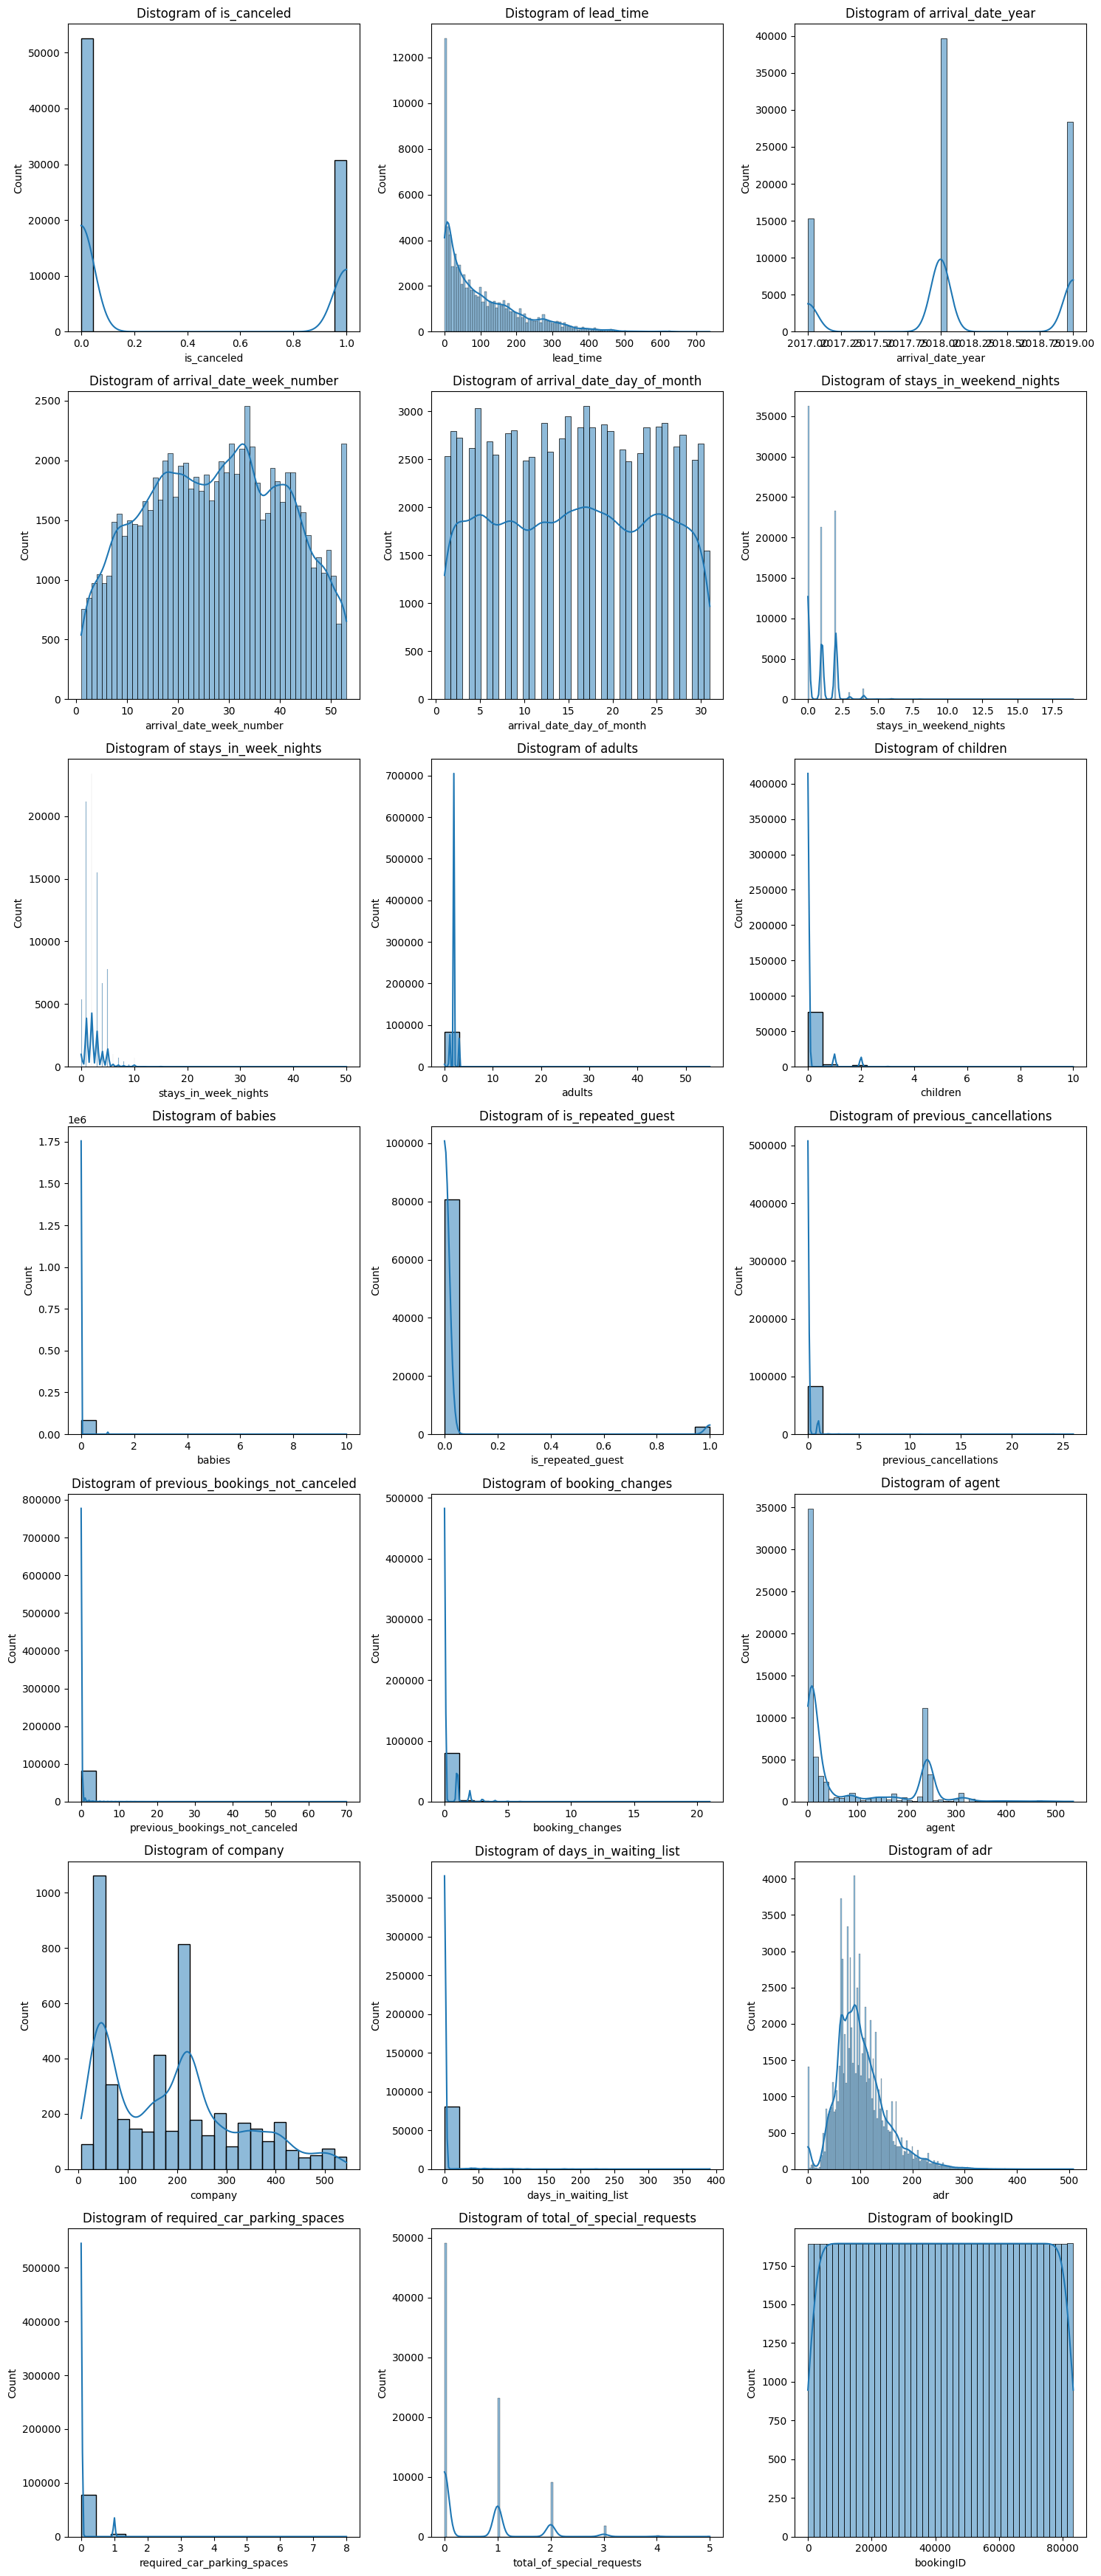

In [112]:
def plot_distograms(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    num_plots = len(num_cols)
    num_cols_plots = 3
    num_rows_plots = (num_plots // num_cols_plots) + (num_plots % num_cols_plots > 0)

    fig, axes = plt.subplots(num_rows_plots, num_cols_plots, figsize=(15, num_rows_plots * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distogram of {col}')

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_distograms(df)

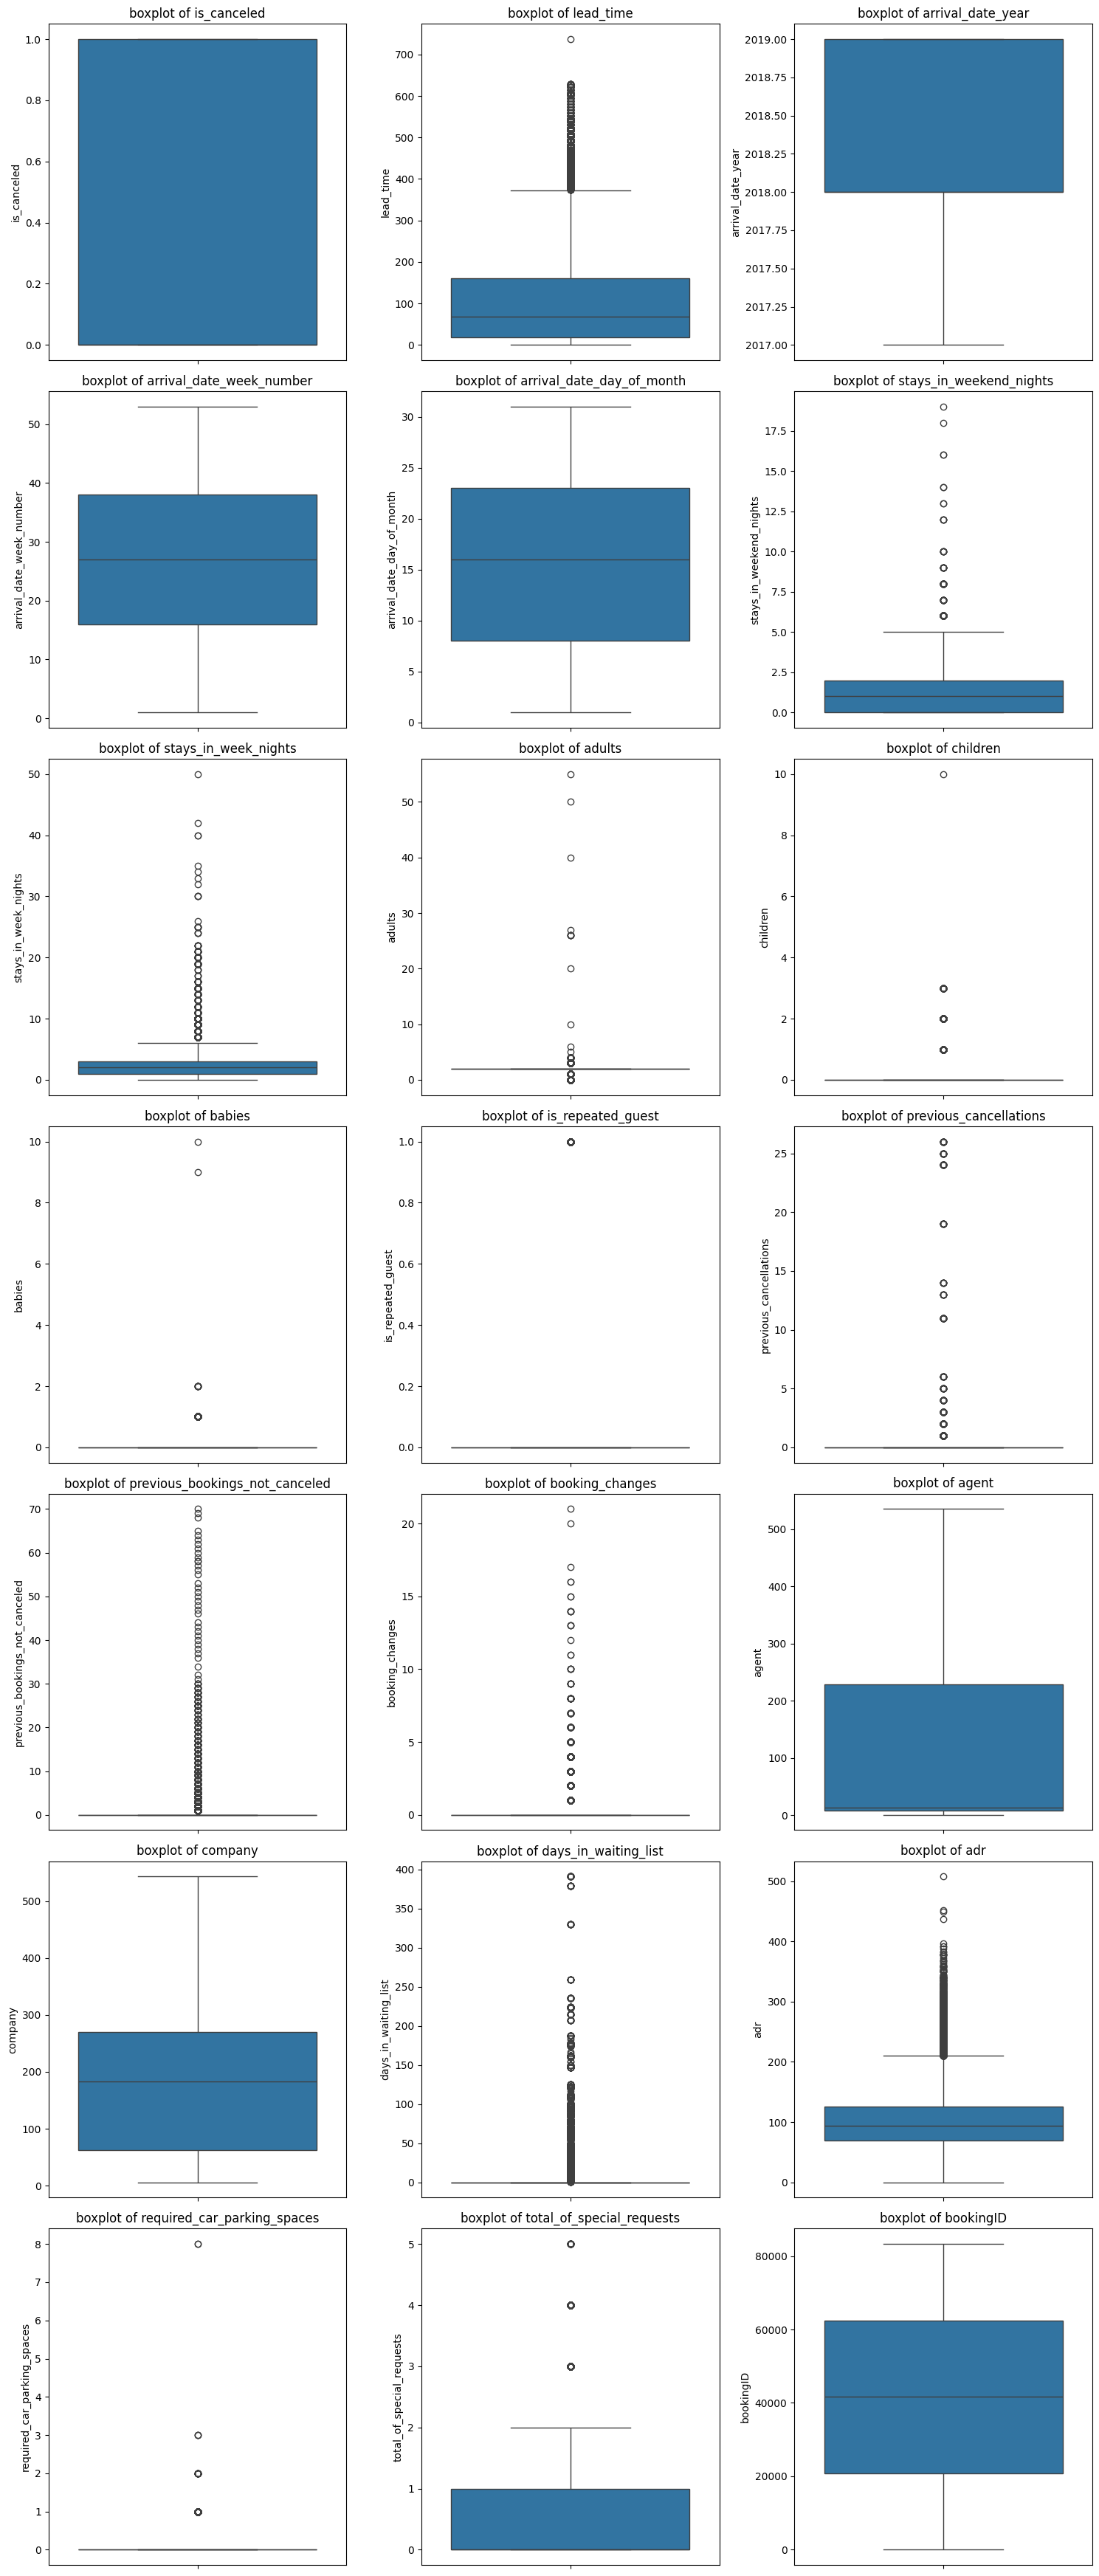

In [113]:
def plot_box(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    num_plots = len(num_cols)
    num_cols_plots = 3
    num_rows_plots = (num_plots // num_cols_plots) + (num_plots % num_cols_plots > 0)

    fig, axes = plt.subplots(num_rows_plots, num_cols_plots, figsize=(15, num_rows_plots * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(f'boxplot of {col}')

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_box(df)

## **Data Preprocessing**

### **Missing Value**

In [114]:
# Check for missing values pada setiap kolom dan buat pecentages proporation diurutkan dari tertinggi
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_df = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Missing Values', 'Missing Values Percentage'])
missing_df

,Missing Values,Missing Values Percentage
company,78559,94.316449
agent,11404,13.691427
country,346,0.415401
children,3,0.003602
hotel,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
days_in_waiting_list,0,0.000000
previous_bookings_not_canceled,0,0.000000


**There are 4 missing value columns, namely**

* company (94.316449%) with a total of 78559
* agent (13.691427%) with a total of 11404
* country (0.415401%) with a total of 346
* childern (0.003602%) with a total of 3

### **Duplicated Data**

In [115]:
#cek duplikat data pada setiap kolom dan persentages propotional
duplicate_df = df.duplicated().sum
print(duplicate_df)

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
83288    False
83289    False
83290    False
83291    False
83292    False
Length: 83293, dtype: bool>


**No Duplicate Data**

### **Handling Missing Value**

In [116]:
df['agent'].fillna(df['agent'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

#hapus missing value pada childern
df.dropna(subset=['children'], inplace=True)

* The agent column is filled with the median because the distribution in the gent box plot does not show any outliers, so the median is the technique used to handle missing values.
* The country column is filled with mode because country is a categorical data type

In [117]:
df.drop(columns=['company'], inplace=True, axis=1)

* The company column is dropped because it has more than 90% missing data

In [118]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**No Missing Value**

### **Data Manipultion**

In [119]:
# reverse status data to datetime type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#ubah tipe data childern ke integer
df['children'] = df['children'].astype(int)

In [120]:
print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

**changing the data type in the childern column to integer and 'reservation_status_date to datetime**

In [121]:
#cek kategorikal kolom
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')


### **Encode Categorical**

**changing the categorical data type for encoding**

In [122]:
#encode categorical
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [123]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,14,0,8,2019,4,2,10,0,4,2,0,0,0,73,6,3,0,0,0,0,0,0,0,314.0,0,2,38.40,0,0,1,2019-01-14,1
1,18,1,524,2018,2,51,15,0,2,2,0,0,0,125,4,3,0,0,0,0,0,0,1,1.0,0,2,62.80,0,0,0,2017-10-21,2
2,56,1,175,2019,8,20,19,1,2,2,0,0,0,125,4,3,0,0,0,0,0,0,1,12.0,0,2,110.00,0,0,0,2018-11-25,3
3,10,0,0,2018,10,43,17,1,0,1,0,0,0,125,2,0,0,0,0,0,0,0,0,14.0,0,2,45.00,0,0,1,2018-10-18,4
4,62,1,33,2017,11,39,26,2,3,2,0,0,0,125,5,3,0,0,0,0,0,0,0,16.0,0,2,57.92,0,1,0,2017-08-24,5


In [124]:
df['country'].unique()

array([ 73, 125,  12,  41,  54,  68,  46,  38, 129, 114,  29, 158,   9,
        24, 113,  51,  26, 151,  21,  83, 122, 162, 123,  65, 104,  62,
        67,  91,  94,  49,  72,  43, 143,  36,  60, 117,  10,  77, 142,
         1,  95,   6, 108,  92,  90,  98, 139, 131, 105, 111, 141,  30,
       147, 128, 140,  16,  47,   5, 160, 134,  18,  25,  64, 157, 152,
         3,  59,  19, 138,  55,  34,  37, 163, 164,  17,  79,  69, 120,
        71, 148,  86, 116,  93, 133, 121,  76,   4,  39,  78,  61,  70,
        53,  87,  97, 150,  45, 155,  57, 126,  84,  82,  66,  32,  58,
        31,  11, 154,  99,  85, 144, 101, 118, 127,   2,  50,  42,  44,
       124,  33,  23, 102,   7, 136, 153,  63,  13,  80,  52,  14, 130,
        20, 161,  22, 149,  15, 106, 115,   0,  48,  28, 119,  27, 109,
        74, 145, 159, 156,  89,  75,   8,  35, 112,  81,  56, 132, 103,
        40, 107, 100,  88, 146, 135,  96, 137, 110])

## **Exploratory Data Analyst (EDA)**

### **Target Variable Distribution**

In [125]:
#percentages and count
df['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.63052
1,0.36948


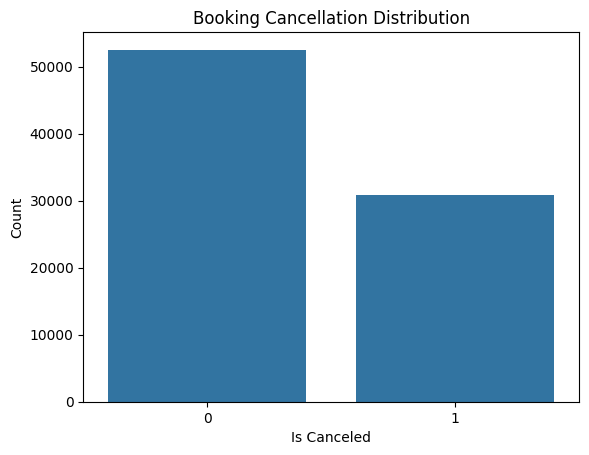

In [126]:
# Target variable distribution and value
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.show()

* **as many as 63,052% of people did not cancel their hotel bookings and**  
* **as many as 36,948% of people canceled their hotel bookings**

### **Booking Cancellation Overview**

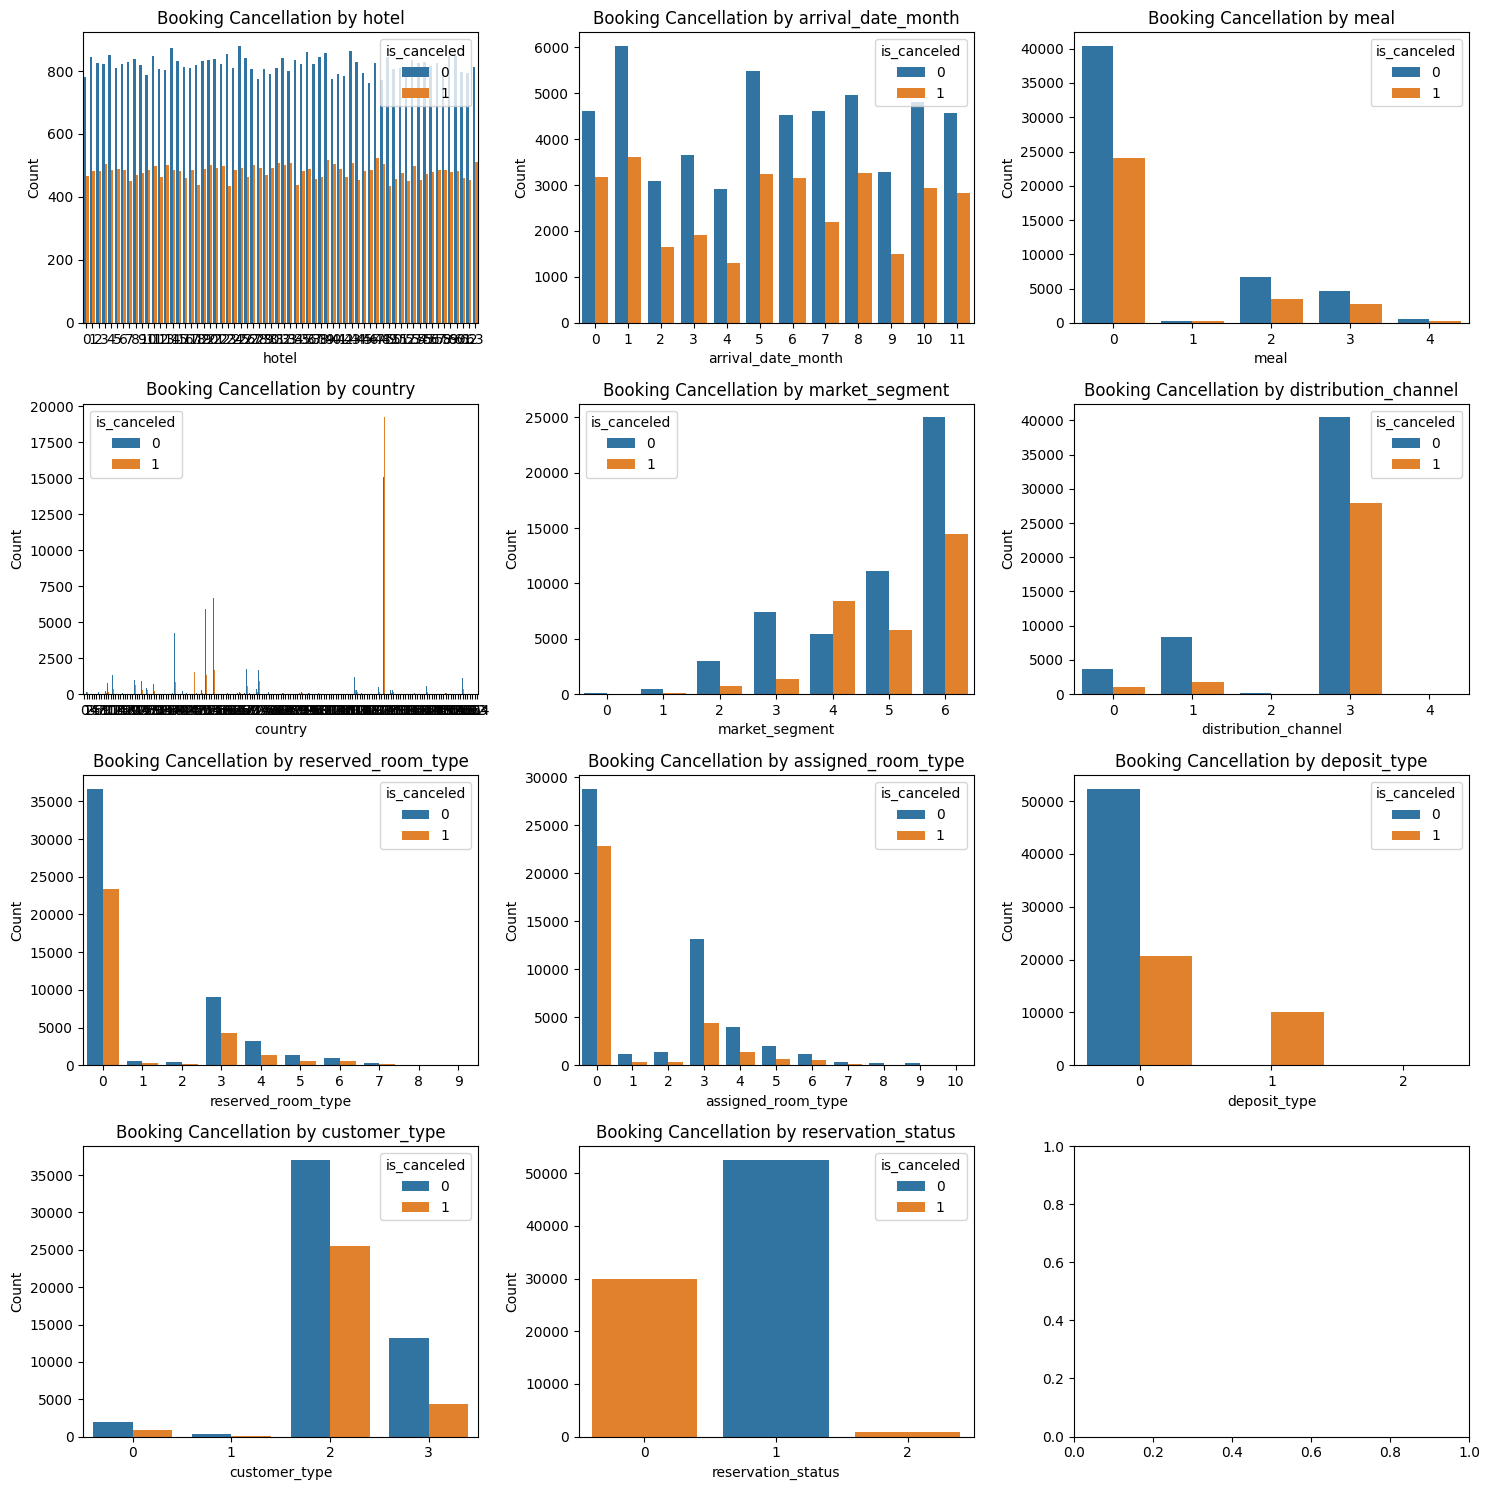

In [127]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='is_canceled', data=df, ax=axes[i])
    axes[i].set_title(f'Booking Cancellation by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

### **Bussines Question**

#### **What is the average length of stay for each hotel type?**

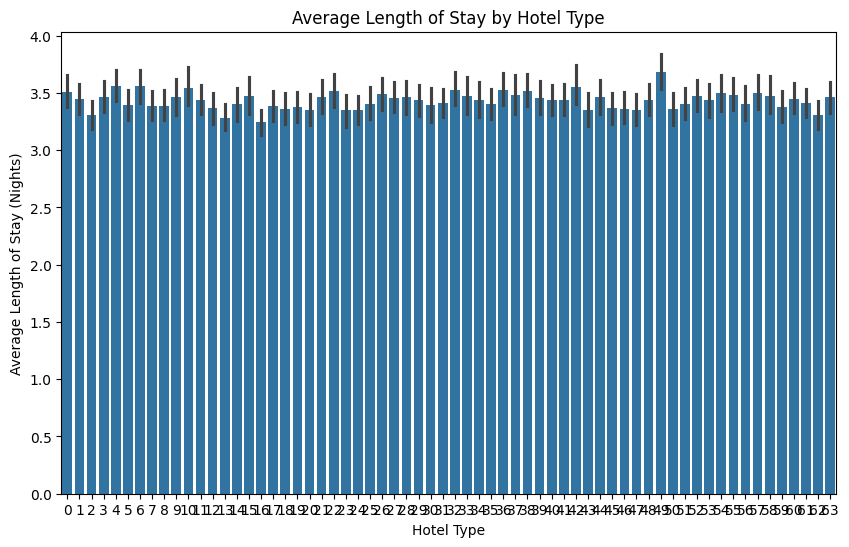

In [128]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='total_nights', data=df)
plt.title('Average Length of Stay by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Length of Stay (Nights)')
plt.show()

**average stay for each type of hotel between 3 to 3.5 nights**

#### **Which marketing channels are the most effective for booking?**

In [129]:
df['market_segment'].value_counts()

,count
market_segment,
6,39444
5,16922
4,13791
3,8741
2,3706
1,524
0,162


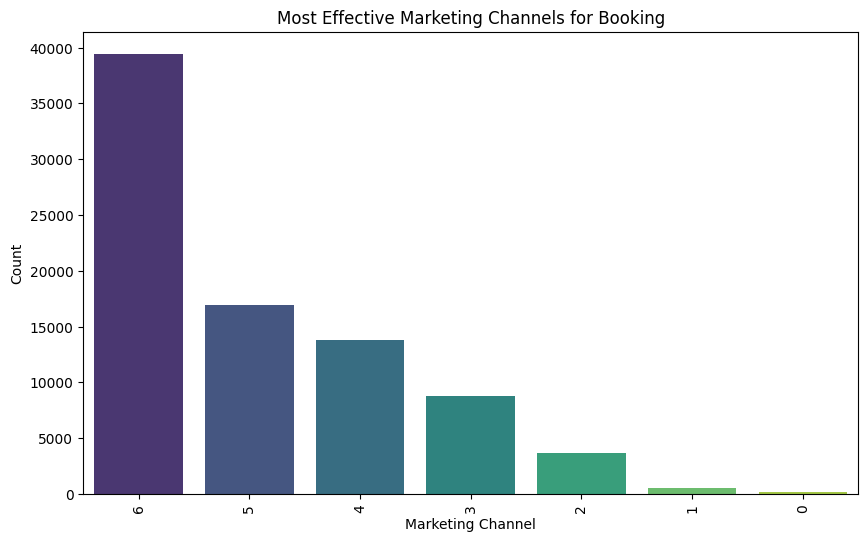

In [130]:
#beri warna pada countplotnya
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', data=df, palette='viridis', order=df['market_segment'].value_counts().index)
plt.title('Most Effective Marketing Channels for Booking')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* 6 = Online TA       39445
* 5 = Offline TA/TO   16922
* 4 = Groups          13791
* 3 = Direct           8742
* 2 = Corporate        3706
* 1 = Complementary     524

============================================================================

* Online TA is the channel with the highest number of bookings, making it the most effective.

* Offline TA/TO ranks second in terms of effectiveness.

* Groups is the third most effective channel, with a significant number of bookings.

* Direct comes after Groups, showing a slightly lower number of bookings.

* Corporate follows Direct in terms of effectiveness.

* Complementary has fewer bookings compared to Corporate.

============================================================================

**The analysis shows that Online TA is the most effective channel**

#### **What are the booking patterns across different months of the year?**

In [131]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
1,9640
5,8731
8,8222
0,7787
10,7741
6,7666
11,7398
7,6810
3,5560


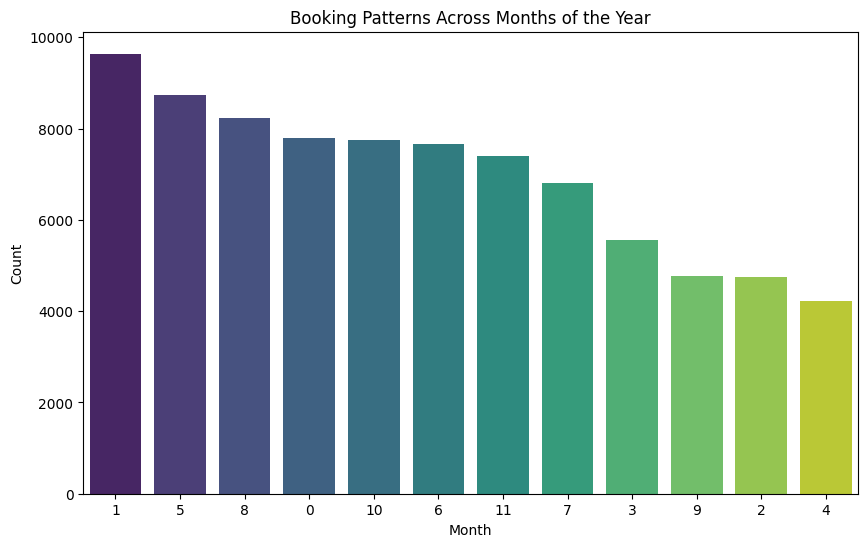

In [132]:
# diurutkan visualisasinya berdasrkan value tertinggike terendah
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', data=df, palette='viridis', order=df['arrival_date_month'].value_counts().index)
plt.title('Booking Patterns Across Months of the Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

* 0 = April
* 1 = August
* 2 = December
* 3 = February
* 4 = January
* 5 = July
* 6 = June
* 7 = March
* 8 = May
* 9 = November
* 10 = October
* 11 = September

============================================================================================

Documentation of Booking Patterns Across Months of the Year:

The analysis shows that bookings are highest in **August**, followed by **July** and **May**. Bookings are lowest in **January** and **December**, indicating higher booking activity during the summer months and lower activity during the winter months.

#### **How do cancellation rates vary across different customer types?**

In [133]:
df['customer_type'].value_counts()

,count
customer_type,
2,62535
3,17552
0,2793
1,410


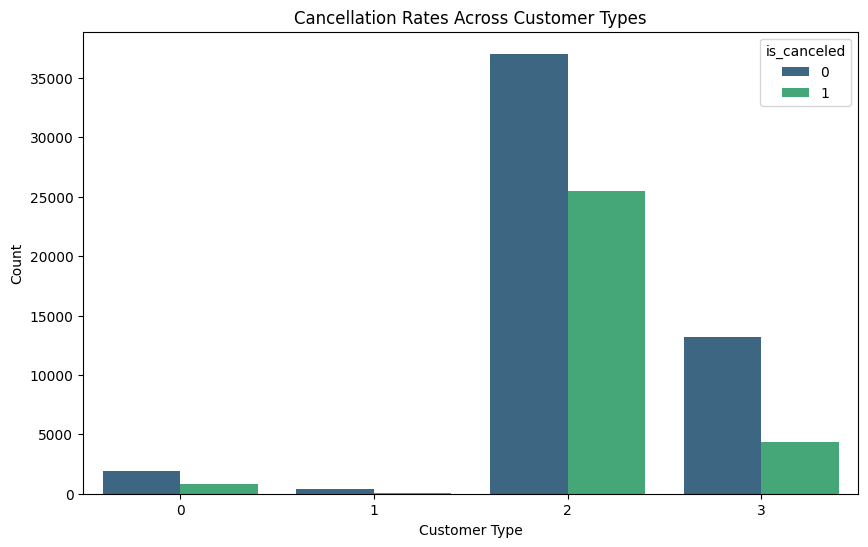

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', data=df, hue='is_canceled', palette='viridis')
plt.title('Cancellation Rates Across Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

* 0 = Cantract
* 1 = Group
* 2 = Transient
* 3 = Transient-Party

========================================================================================

Customer Type and Cancellation Status

* Transient: Most bookings, highest cancellations

* Groups: fewer bookings, lower cancellations.

* Conclusion: Understanding customer types can support tailored booking policies to reduce cancellations.

## **Feature Engineering**

### **New Features**

In [135]:
#total guest
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [136]:
# Revenue per Stay
df['revenue_per_stay'] = df['adr'] * df['total_nights']

In [137]:
# Is Mismatched Room
df['is_mismatched_room'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int)

In [138]:
#Categorize lead_time into short, medium, and long-term
def categorize_lead_time(lead_time):
    if lead_time <= 30:
        return 'Short-term'
    elif lead_time <= 90:
        return 'Medium-term'
    else:
      return 'Long-term'
print(df['lead_time'].apply(categorize_lead_time).unique())

['Short-term' 'Long-term' 'Medium-term']


In [139]:
df.shape

(83290, 36)

In [140]:
df.drop(['stays_in_weekend_nights',
         'stays_in_week_nights',
         'reservation_status_date',
         'adults',
         'children',
         'babies',
         'reservation_status'],
        axis=1, inplace=True)

In [141]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,bookingID,total_nights,total_guests,revenue_per_stay,is_mismatched_room
0,14,0,8,2019,4,2,10,0,73,6,3,0,0,0,0,0,0,0,314.0,0,2,38.40,0,0,1,4,2,153.6,0
1,18,1,524,2018,2,51,15,0,125,4,3,0,0,0,0,0,0,1,1.0,0,2,62.80,0,0,2,2,2,125.6,0
2,56,1,175,2019,8,20,19,0,125,4,3,0,0,0,0,0,0,1,12.0,0,2,110.00,0,0,3,3,2,330.0,0
3,10,0,0,2018,10,43,17,0,125,2,0,0,0,0,0,0,0,0,14.0,0,2,45.00,0,0,4,1,1,45.0,0
4,62,1,33,2017,11,39,26,0,125,5,3,0,0,0,0,0,0,0,16.0,0,2,57.92,0,1,5,5,2,289.6,0


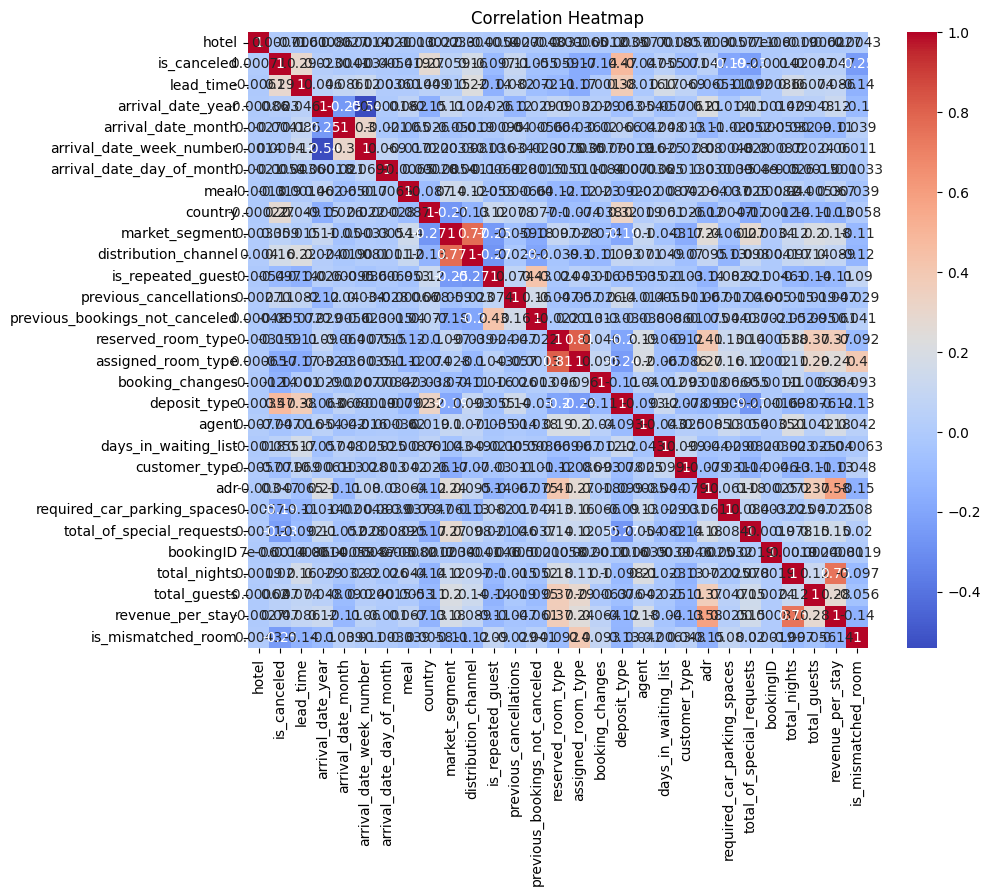

In [142]:
#cek corelation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [143]:
#cek korelasi menggunakan data frame
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,bookingID,total_nights,total_guests,revenue_per_stay,is_mismatched_room
hotel,1.000000,0.000711,-0.006052,-0.000865,0.002650,0.001361,0.002066,-0.001315,-0.000216,0.003286,0.003982,-0.005415,0.002702,0.000484,-0.003093,0.000653,-0.001206,-0.003492,0.007672,-0.001791,0.005745,-0.003038,-0.005673,0.001129,0.000007,0.001889,-0.000617,-0.002697,0.004285
is_canceled,0.000711,1.000000,0.290928,0.022639,-0.004062,0.003422,-0.005385,-0.019102,0.266439,0.058683,0.164774,-0.097276,0.106468,-0.055479,-0.058628,-0.173184,-0.143089,0.470336,-0.046663,0.054718,-0.071247,0.046952,-0.193134,-0.234110,-0.001427,0.019618,0.047244,0.046741,-0.246044
lead_time,-0.006052,0.290928,1.000000,0.046086,0.085879,0.123950,0.003593,0.001444,0.049493,0.015023,0.220744,-0.141848,0.082236,-0.071834,-0.106314,-0.171579,0.001007,0.377615,-0.015870,0.172037,0.069143,-0.064532,-0.112844,-0.092146,0.000863,0.157168,0.073647,0.086358,-0.141140
arrival_date_year,-0.000865,0.022639,0.046086,1.000000,-0.254215,-0.541183,-0.000179,0.061793,-0.152626,0.106060,0.023854,0.026083,-0.115540,0.029392,0.089839,0.031596,0.029431,-0.062664,0.054251,-0.056704,-0.006134,0.206170,-0.013981,0.109011,0.001448,0.029089,0.048287,0.123131,-0.100856
arrival_date_month,0.002650,-0.004062,0.085879,-0.254215,1.000000,0.303012,-0.020543,-0.064639,0.026492,-0.050425,-0.018938,-0.000955,0.039987,-0.005565,-0.064183,-0.036483,-0.019506,0.066147,-0.042021,0.048070,0.012840,-0.114715,-0.019817,-0.051603,-0.000591,-0.031712,-0.089897,-0.110297,0.039171
arrival_date_week_number,0.001361,0.003422,0.123950,-0.541183,0.303012,1.000000,0.068811,-0.016760,0.022261,0.003326,0.008111,-0.035839,0.033852,-0.022651,-0.007464,-0.003505,0.007735,-0.000186,-0.016042,0.024607,-0.027996,0.079960,0.004796,0.027940,-0.000873,0.019699,0.023975,0.059727,0.010615
arrival_date_day_of_month,0.002066,-0.005385,0.003593,-0.000179,-0.020543,0.068811,1.000000,-0.006534,0.000277,-0.005415,0.001063,-0.006870,-0.027691,-0.001536,0.014663,0.011365,0.008373,-0.000705,-0.000360,0.024710,0.012527,0.030376,0.003857,0.000890,-0.000054,-0.025772,0.001526,-0.000998,-0.003345
meal,-0.001315,-0.019102,0.001444,0.061793,-0.064639,-0.016760,-0.006534,1.000000,-0.087104,0.143210,0.115014,-0.053264,-0.000662,-0.040155,-0.117179,-0.116017,0.022944,-0.092363,-0.019892,-0.008723,0.042304,0.063542,-0.037251,0.024547,0.000824,0.044413,-0.005341,0.067279,-0.038972
country,-0.000216,0.266439,0.049493,-0.152626,0.026492,0.022261,0.000277,-0.087104,1.000000,-0.270104,-0.132147,0.124786,0.077661,0.077199,-0.100613,-0.074444,-0.038446,0.324513,0.018764,0.061090,0.025574,-0.124354,0.004709,-0.166335,-0.001246,-0.135582,-0.105177,-0.131914,0.005762
market_segment,0.003286,0.058683,0.015023,0.106060,-0.050425,0.003326,-0.005415,0.143210,-0.270104,1.000000,0.767345,-0.248341,-0.058761,-0.178172,0.096888,0.027777,-0.073727,-0.186281,0.102634,-0.043380,-0.167573,0.243925,-0.061372,0.273712,0.003377,0.121244,0.204514,0.181110,-0.105182


### **Feature Selection**

In [144]:
#Use variance inflation factor (VIF) and correlation analysis to remove redundant features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['vif_factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [145]:
#  Select numerical features for VIF calculation
numerical_features = df[['total_nights', 'total_guests', 'revenue_per_stay', 'adr', 'lead_time', 'is_mismatched_room']]

# Calculate VIF for numerical features
df_vif = calculate_vif(numerical_features)
print(df_vif)

             features  vif_factor
0        total_nights    7.050163
1        total_guests    7.748077
2    revenue_per_stay    8.559730
3                 adr    9.060168
4           lead_time    1.965149
5  is_mismatched_room    1.140600


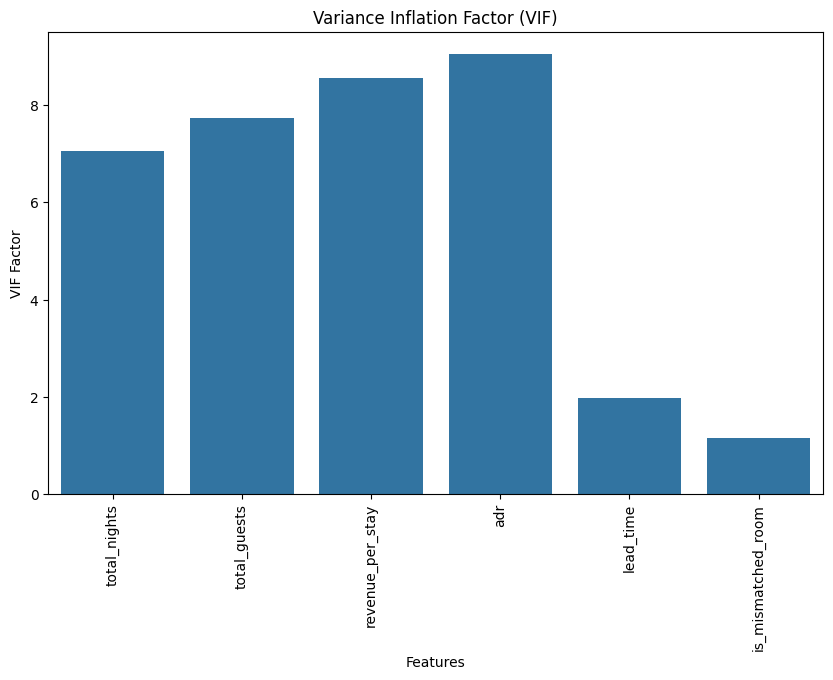

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='features', y='vif_factor', data=df_vif)
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('Features')
plt.ylabel('VIF Factor')
plt.xticks(rotation=90)
plt.show()

**drop feature with high vif.**

**If a feature has a high VIF (>5), consider dropping it or combining it with other features.**

In [147]:
df.drop(['total_nights', 'total_guests', 'revenue_per_stay','adr'], axis=1, inplace=True)

**Target Variable**

In [148]:
X = df.drop(['is_canceled'], axis=1)  # Independent features
y = df['is_canceled']  # Target variable

## **Modeling**

In [149]:
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For converting categorical data into numerical labels
from sklearn.preprocessing import StandardScaler  # For standardizing features by scaling

# Classification algorithms
from sklearn.tree import DecisionTreeClassifier  # For decision tree-based classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.ensemble import RandomForestClassifier  # For random forest-based classification
from xgboost import XGBClassifier  # For gradient boosting classification using XGBoost

# Model evaluation metrics
from sklearn.metrics import classification_report  # For generating a classification report (precision, recall, etc.)
from sklearn.metrics import confusion_matrix  # For calculating the confusion matrix
from sklearn.metrics import accuracy_score  # For calculating the accuracy of the model
from sklearn.metrics import RocCurveDisplay  # For displaying the ROC curve for binary classifiers

In [150]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [151]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [152]:
# Train a Random Forest model with cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')

Cross-validation scores: [0.89806605 0.8956263  0.89473371 0.89288902 0.89336507]
Mean cross-validation score: 0.8949360309431716


In [153]:
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8987956395487219
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10575
           1       0.91      0.89      0.90     10432

    accuracy                           0.90     21007
   macro avg       0.90      0.90      0.90     21007
weighted avg       0.90      0.90      0.90     21007

[[9618  957]
 [1169 9263]]


In [154]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6703479792450135
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     10575
           1       0.68      0.65      0.66     10432

    accuracy                           0.67     21007
   macro avg       0.67      0.67      0.67     21007
weighted avg       0.67      0.67      0.67     21007

[[7345 3230]
 [3695 6737]]


In [155]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8500975865187794
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10575
           1       0.85      0.85      0.85     10432

    accuracy                           0.85     21007
   macro avg       0.85      0.85      0.85     21007
weighted avg       0.85      0.85      0.85     21007

[[8959 1616]
 [1533 8899]]


In [156]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.691864616556386
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     10575
           1       0.66      0.77      0.71     10432

    accuracy                           0.69     21007
   macro avg       0.70      0.69      0.69     21007
weighted avg       0.70      0.69      0.69     21007

[[6541 4034]
 [2439 7993]]


In [157]:
#xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8980339886704432
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10575
           1       0.90      0.89      0.90     10432

    accuracy                           0.90     21007
   macro avg       0.90      0.90      0.90     21007
weighted avg       0.90      0.90      0.90     21007

[[9548 1027]
 [1115 9317]]


## **Evaluation**

In [158]:
# Models dictionary (contains actual model objects)
models_dict = {
    "Random Forest": rf_model,
    "Logistic Regression": logreg,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "XGBoost": xgb
}

# Initialize an empty list to store results
evaluation_summary = []

# Loop through models and extract evaluation metrics
for model_name, model in models_dict.items():
    # Predictions and metrics
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    # Add the metrics to the summary list
    evaluation_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score'],
        "ROC AUC": roc_auc,
        "Specificity": specificity,
        "Sensitivity": sensitivity
    })

# Convert the summary list into a DataFrame
evaluation_df = pd.DataFrame(evaluation_summary)

# Display the DataFrame
evaluation_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,Specificity,Sensitivity
0,Random Forest,0.898796,0.906360,0.887941,0.897056,0.898722,0.909504,0.887941
1,Logistic Regression,0.670348,0.675931,0.645801,0.660523,0.670182,0.694563,0.645801
2,Decision Tree,0.850098,0.846315,0.853048,0.849668,0.850118,0.847187,0.853048
3,K-Nearest Neighbors,0.691865,0.664588,0.766200,0.711786,0.692367,0.618534,0.766200
4,XGBoost,0.898034,0.900715,0.893117,0.896900,0.898001,0.902884,0.893117


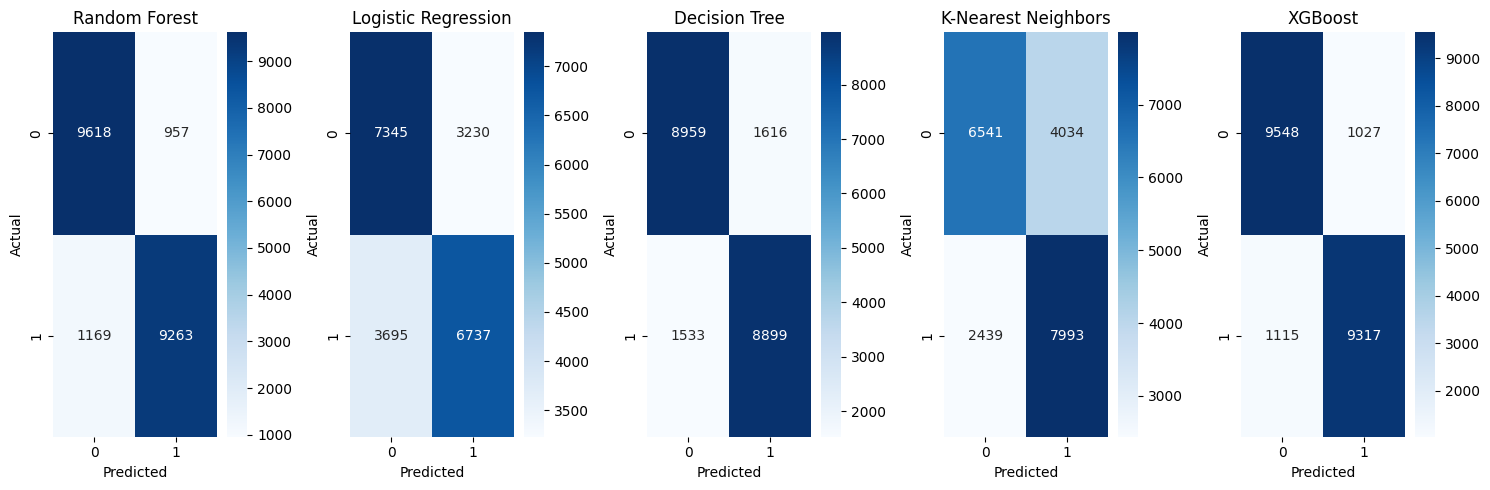

In [159]:
#buat visualisasi semua model confusion matrix dalam satu frame
fig, axs = plt.subplots(1, len(models_dict), figsize=(15, 5))
for i, (model_name, model) in enumerate(models_dict.items()):
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(model_name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

The analysis based on the given data and visualizations:

Evaluation Based on F1-Score:
* F1-Score combines precision and recall, which is crucial in handling imbalanced datasets. The model with the highest F1-Score is **Random Forest (0.897056)**, followed by **XGBoost (0.896900)**.

False Negative Rate (FNR):
* FNR is the complement of recall, representing the percentage of actual positives that are misclassified as negatives.

* The highest recall is observed in Random Forest (0.887941) and XGBoost (0.893117).
Both models show a low FNR, capturing most positive cases accurately.

In [160]:
#impeentasikan model menggunakan feature important xgb
importances = xgb.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
16,deposit_type,0.481247
23,is_mismatched_room,0.134715
20,required_car_parking_spaces,0.090828
21,total_of_special_requests,0.043522
19,customer_type,0.038270
11,previous_cancellations,0.026461
8,market_segment,0.022522
7,country,0.019432
15,booking_changes,0.019079
17,agent,0.017976


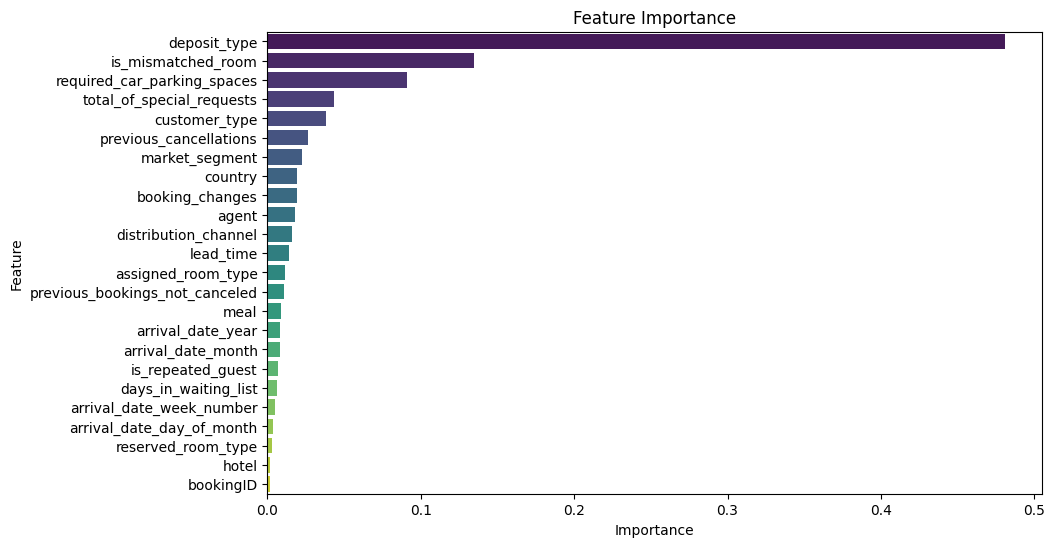

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Feature Importance Insights**

The most significant feature is **deposit_type**, followed by **is_mismatched_room** and **required_car_parking_spaces**.
These insights suggest that deposit policies, room allocation accuracy, and parking availability play a crucial role in predictions.

## **Recomendation**

* Random Forest is recommended as the best model based on its strong performance in F1-Score, recall, and overall metrics.
* XGBoost is a solid alternative if the focus is on reducing false positives.
* Further analysis of the most important features is advised to optimize hotel booking strategies.